# Exploratory data analysis  
**Created by mrpintime**

# Data Set Information  

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).  

# Attribute Information:  

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 sex - student's sex (binary: 'F' - female or 'M' - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

# these grades are related with the course subject, Math or Portuguese:  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)


# Objects  
> Visualize data to better understanding  
> Find relation between features  
> Create a handcrafted features  
> Correct the null values  
> univariant and bivariant analysis  
> outliers detection
> use deep learning to create learned features

# Setup

In [ ]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import tensorflow as tf
#for use ANOVA
from scipy import stats
# for winsorizing our outliers
# from scipy.stats.mstats import winsorize

In [ ]:
# import dataset

In [ ]:
# import dataset
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Performance/Wrangling and EDA/wrangled.csv')

In [ ]:
df = df_data.copy() # save original dataset

# prepare dataset for EDA

based on dataset information we know that `G1`,`G2`,`G3` are highly correlated therefore for simplicity we only use check releation between features and `G3`.

In [ ]:
df[['G1','G2','G3']].cov() # covariance matrix

,G1,G2,G3
G1,8.900639,8.416207,9.329573
G2,8.416207,10.791692,11.562913
G3,9.329573,11.562913,14.936647


In [ ]:
df[['G1','G2','G3']].corr() # Pearson correlation matrix

,G1,G2,G3
G1,1.000000,0.858739,0.809142
G2,0.858739,1.000000,0.910743
G3,0.809142,0.910743,1.000000


We can see G1, G2, G3 are highly correlated

Check null and redundant values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index.is_unique

True

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
obj_columns = df.select_dtypes(include='object').columns.to_list()
obj_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

# Analysis (univariant and bivariant)

In [ ]:
new_obj = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
 'internet',
 'romantic']

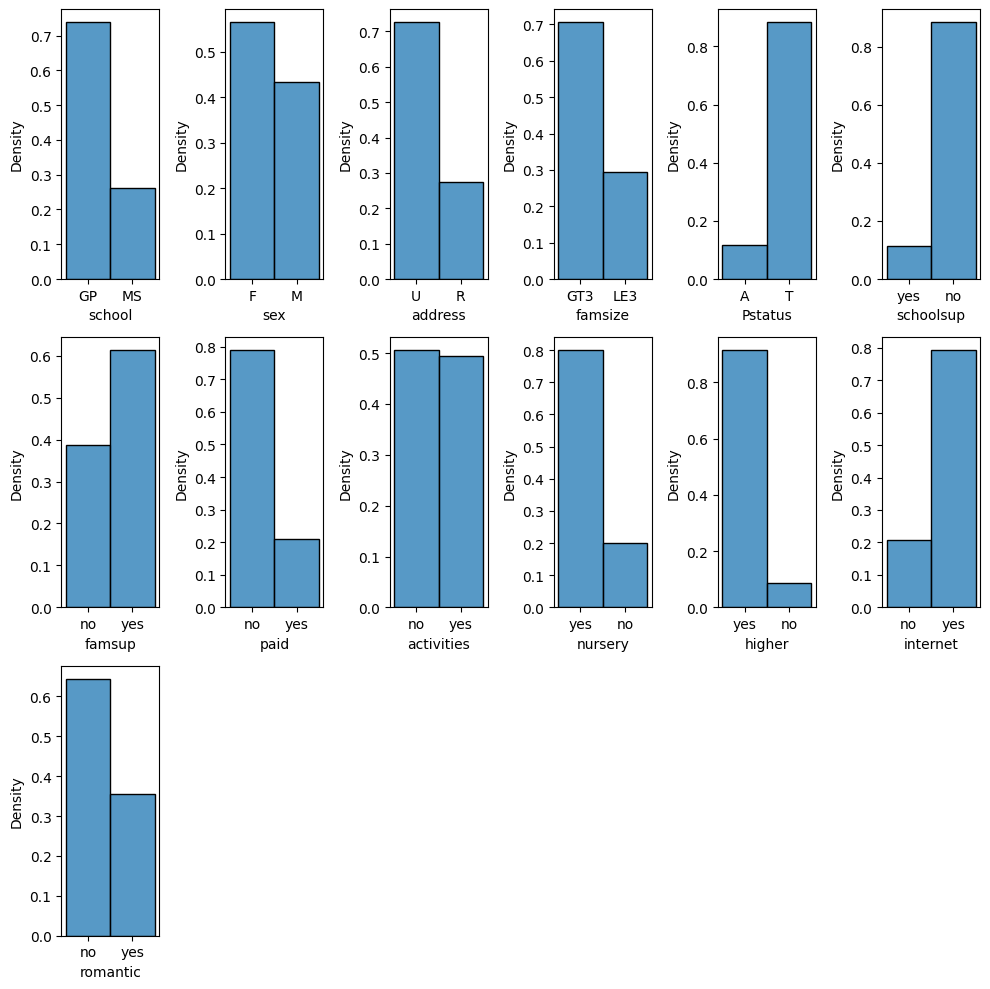

In [ ]:
fig = plt.figure(figsize=(10,10))

for index,i in enumerate(new_obj):
    ax = fig.add_subplot(3,6,index+1)
    sns.histplot(df[i], stat='density', ax=ax)
plt.tight_layout()

* most categorical features have obvious diffrence in their specific values except `activities` that `no` and `yes` are equal in overal.
* Most of student overally situation is :   
    1. are in `GP` school.  
    2. are `Female`.
    3. are in `Urban` area.
    4. have `family size` greater than `3`.  
    5. their `parents` live `together`.  
    6. they do `not` have `Extra educational support`.
    7. they have `family support`.
    8. they did `not` pay money for `extra classes`.  
    9. they attended in `nursery school`.
    10. they want to `take higher education`.
    11. they have `internet connection`.
    12. they do `not` have `romantic relationship`.

---

activities feature means student has extra curricular activities or not that its values are equally spread between `yes` and `no`.

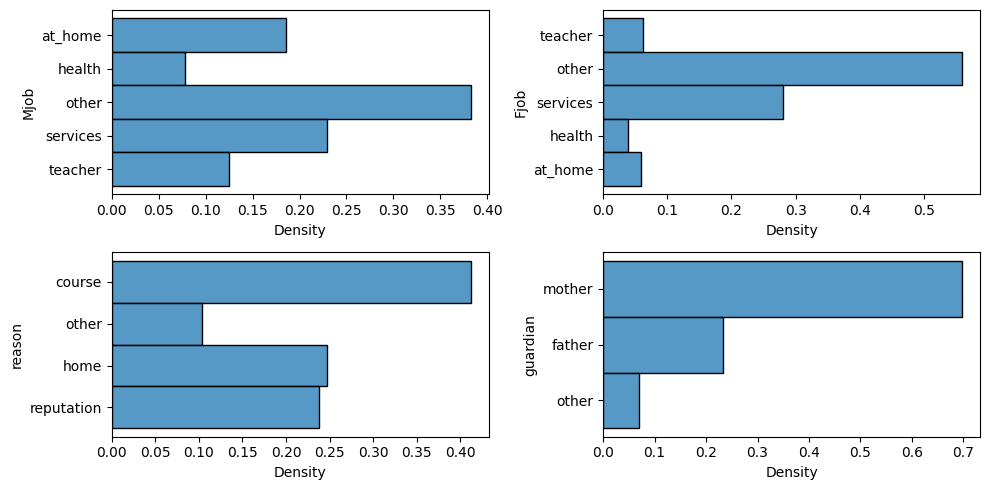

In [ ]:
fig = plt.figure(figsize=(10,5))
for index,i in enumerate(['Mjob', 'Fjob', 'reason', 'guardian']):
    ax = fig.add_subplot(2,2,index+1)
    sns.histplot(y=df[i], stat='density', ax=ax)
plt.tight_layout()

in overal between students  
* `50 percent` of Fathers and Mothers work at `services jobs (e.g. administrative or police)` or `other`.  
* most student have their `mother` as their `guardian`.
* `home` and `reputation` have equal involment in reason to choose school.
* `course` of the school has the most involment in reson to choose school.  

With all this result we want to see how G1, G2, G3 are spread

In [ ]:
df[['G1','G2','G3']].describe().iloc[1:, ]

,G1,G2,G3
mean,11.213602,11.246169,11.341954
std,2.983394,3.285071,3.864796
min,0.000000,0.000000,0.000000
25%,9.000000,9.000000,10.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


here we can see all scores have same mean around `11`, their standard deviations are around `3-4`, minimum is `0` and potential maximum is `20`.  

---

We can have 2 hypothesis:
1. scores of students in one school is equal to other school.  
2. scores of students in one school is normal and in other school is too weak


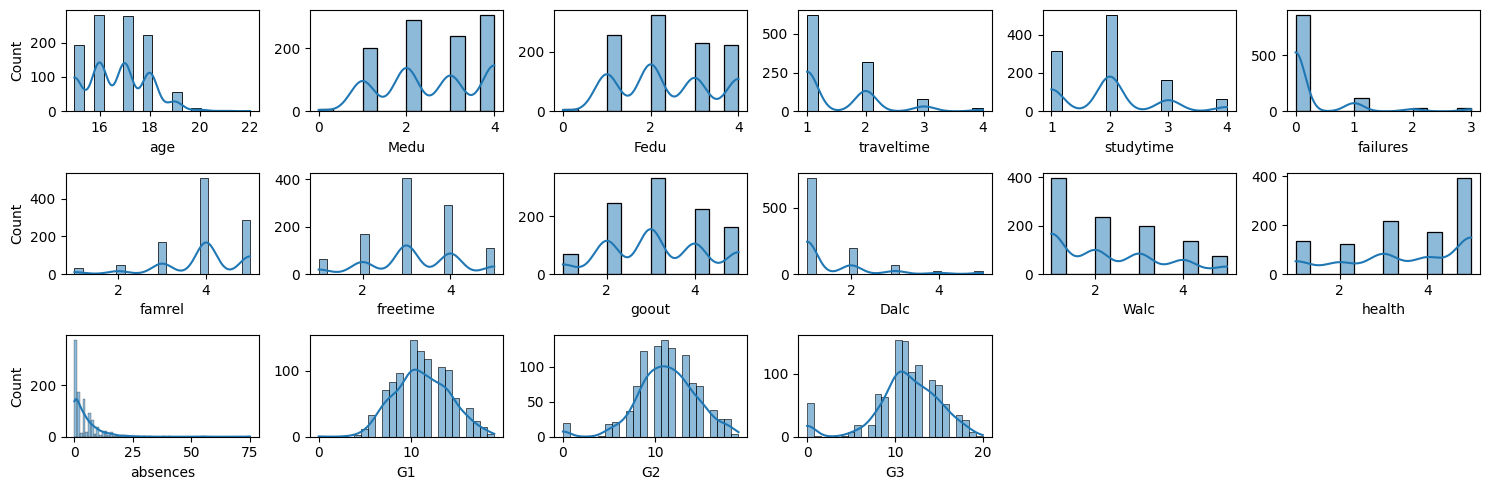

In [ ]:
fig = plt.figure(figsize=(15,5))
for index,i in enumerate(num_columns):
    ax = fig.add_subplot(3,6,index+1)
    axw = sns.histplot(x=df[i], stat='count', kde=True, ax=ax)
    if index+1 in [1,7,13]:
        axw.set_ylabel('Count')
    else:
        axw.set_ylabel('')
plt.tight_layout()

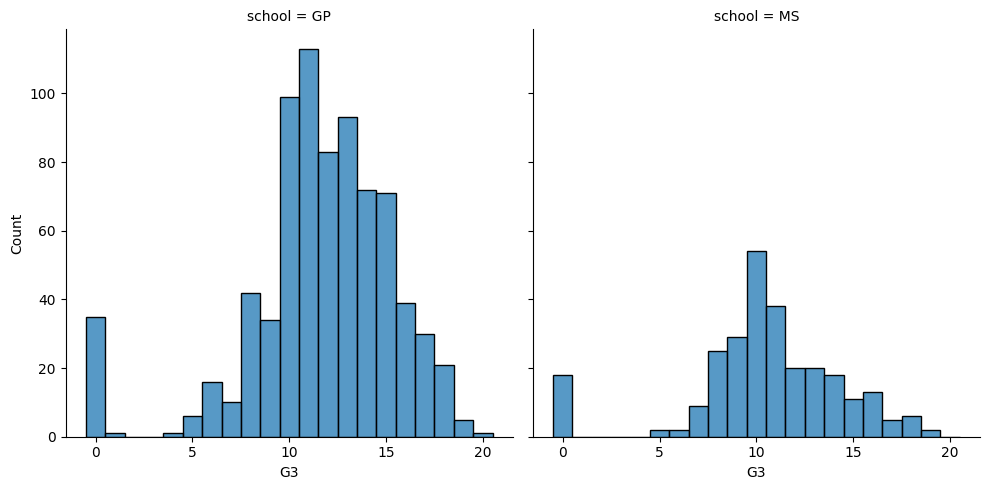

In [ ]:
sns.displot(df, x='G3', col="school", discrete=True)

In [ ]:
df[['G3', 'school']].groupby('school').mean()

,G3
school,
GP,11.633420
MS,10.514706


here we can see our `first hypothesis` was right and mean of scores in `GP school` is `equal` to `MS school`

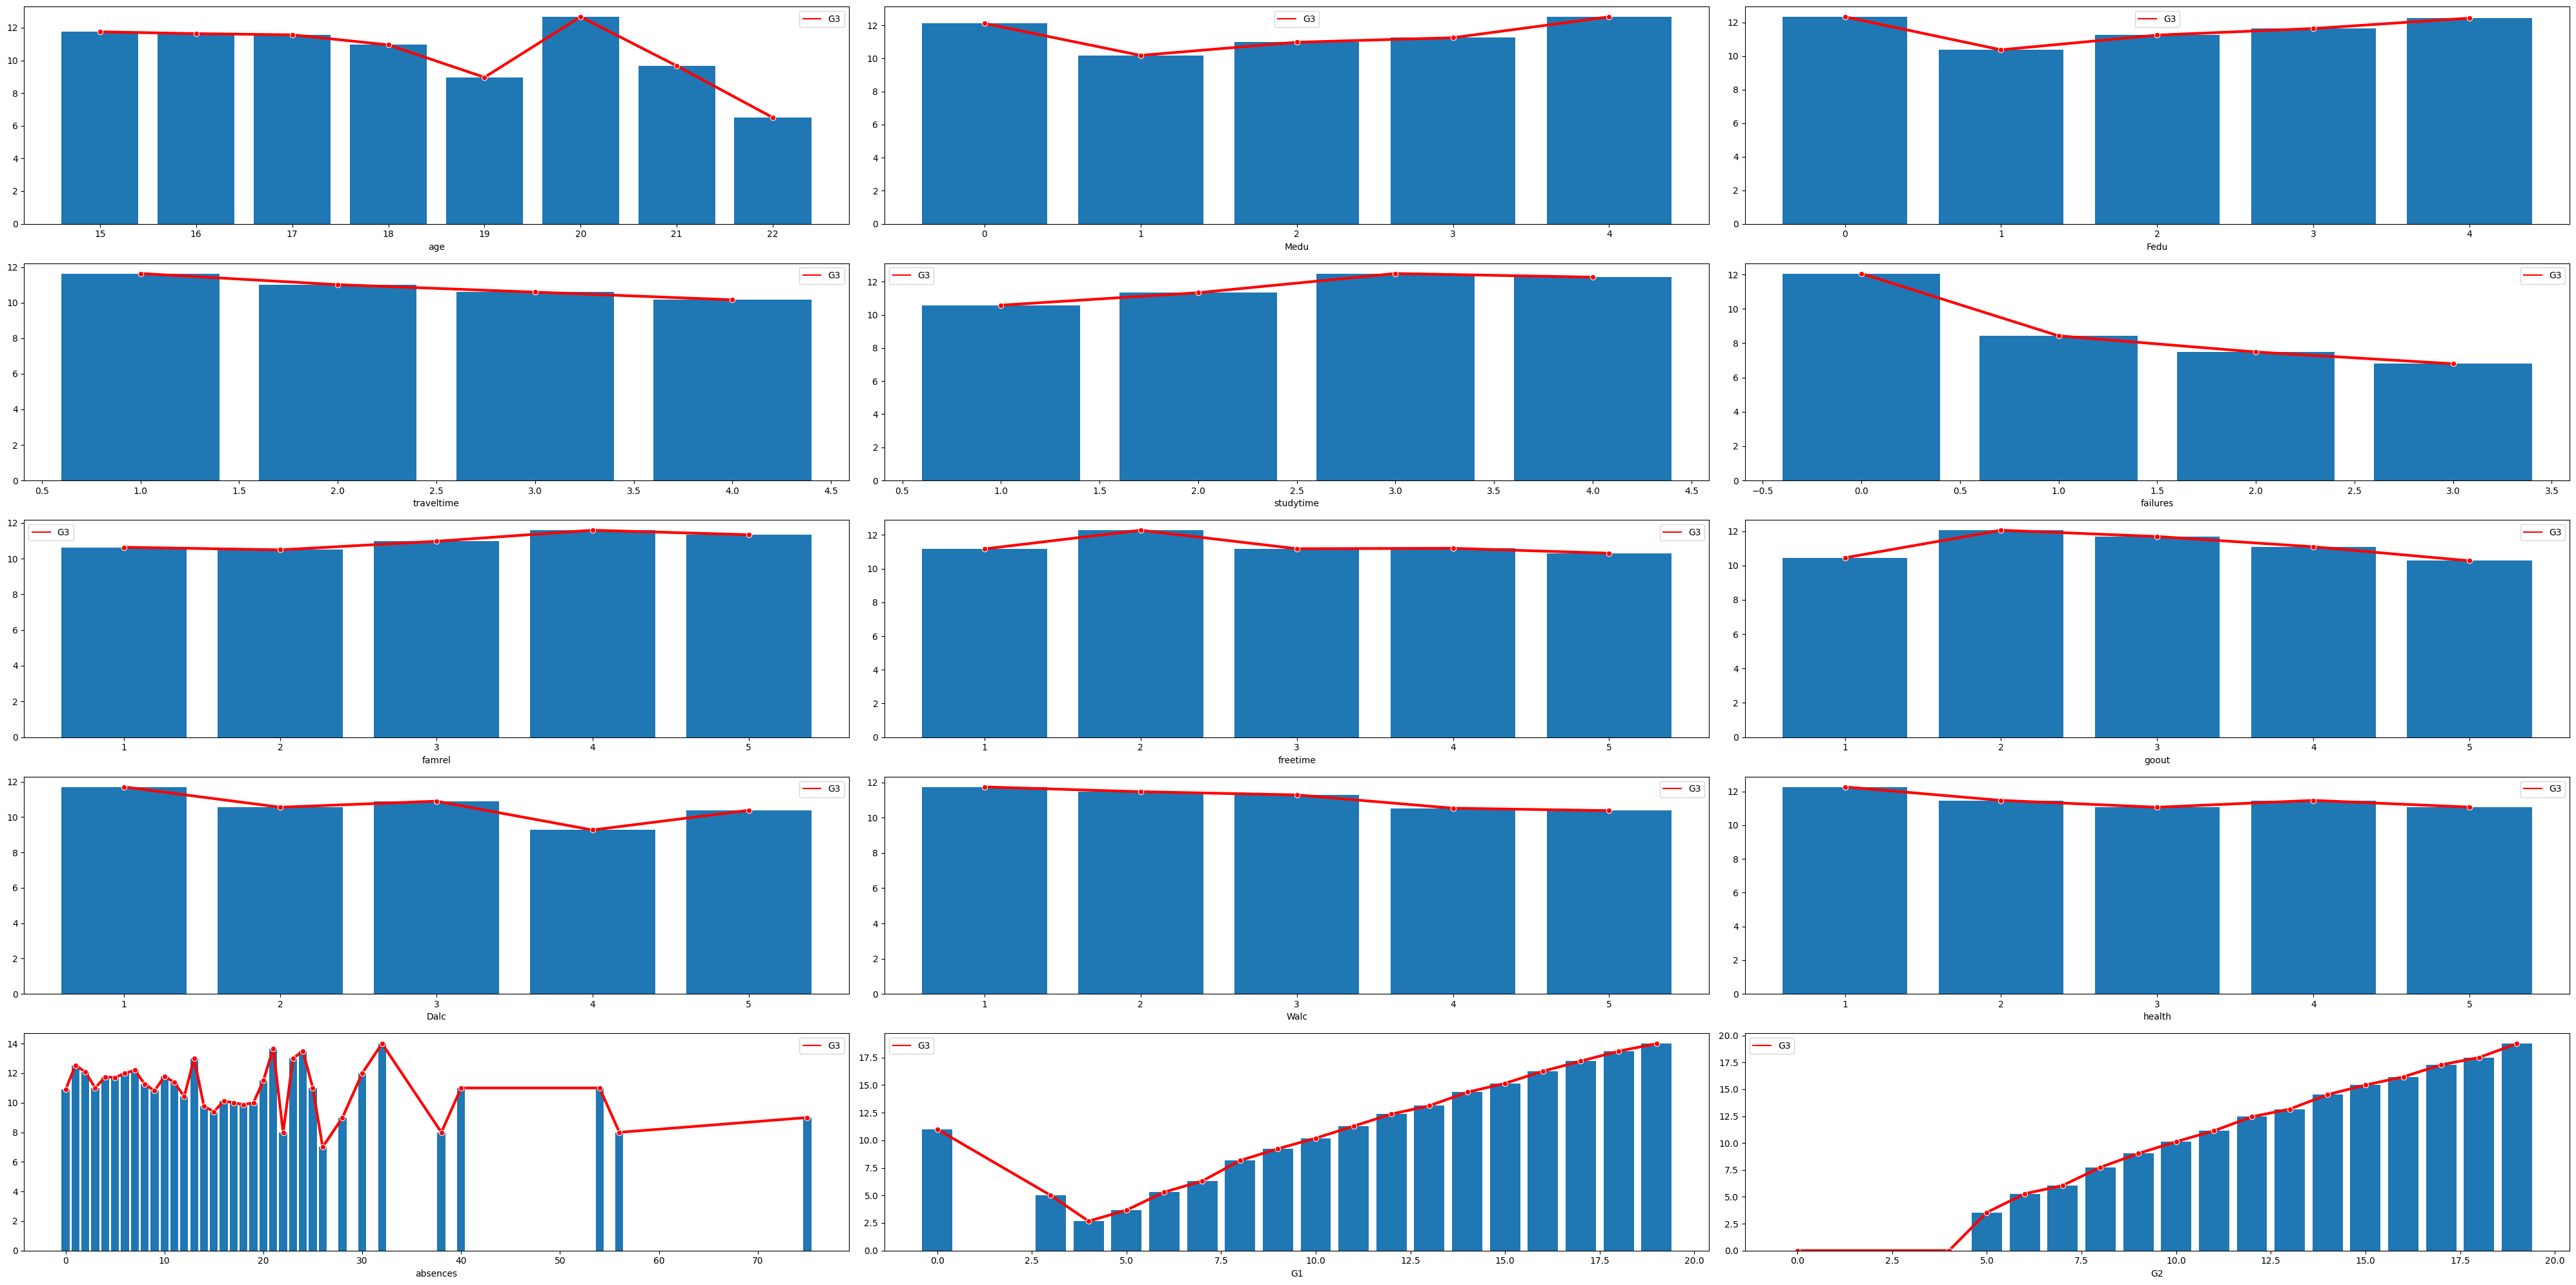

In [ ]:
plt.figure(figsize=(40,20))
for index,i in enumerate(num_columns):
    if i == 'G3':
        continue
    a = df[['G3', i]].groupby(i).mean()
    axis = plt.subplot(5,3,index+1)
    axis.bar(x=a.index, height=a.G3)
    sns.lineplot(a, marker='o', palette=['red'], ax=plt.subplot(5,3,index+1), linewidth=3)


plt.tight_layout()

Here we can see significant difference in scores(G3):  
1. students with age `22` have lowest and age `20` have highest mean of score.
2. students with `Father education` type `1` and `Mother education` type `1` have lowest mean of score.
3. there is `no` difference between mean of score of student with `studytime` 3 or 4.  
4. students with `0` failure have higher mean of score.
5. students with workday alcohol consumption type 4 have the lowest mean of score.
6. students with `26` number of school absences have lowest mean of score and on the other hand students with `32` number of school absences have highest mean of score


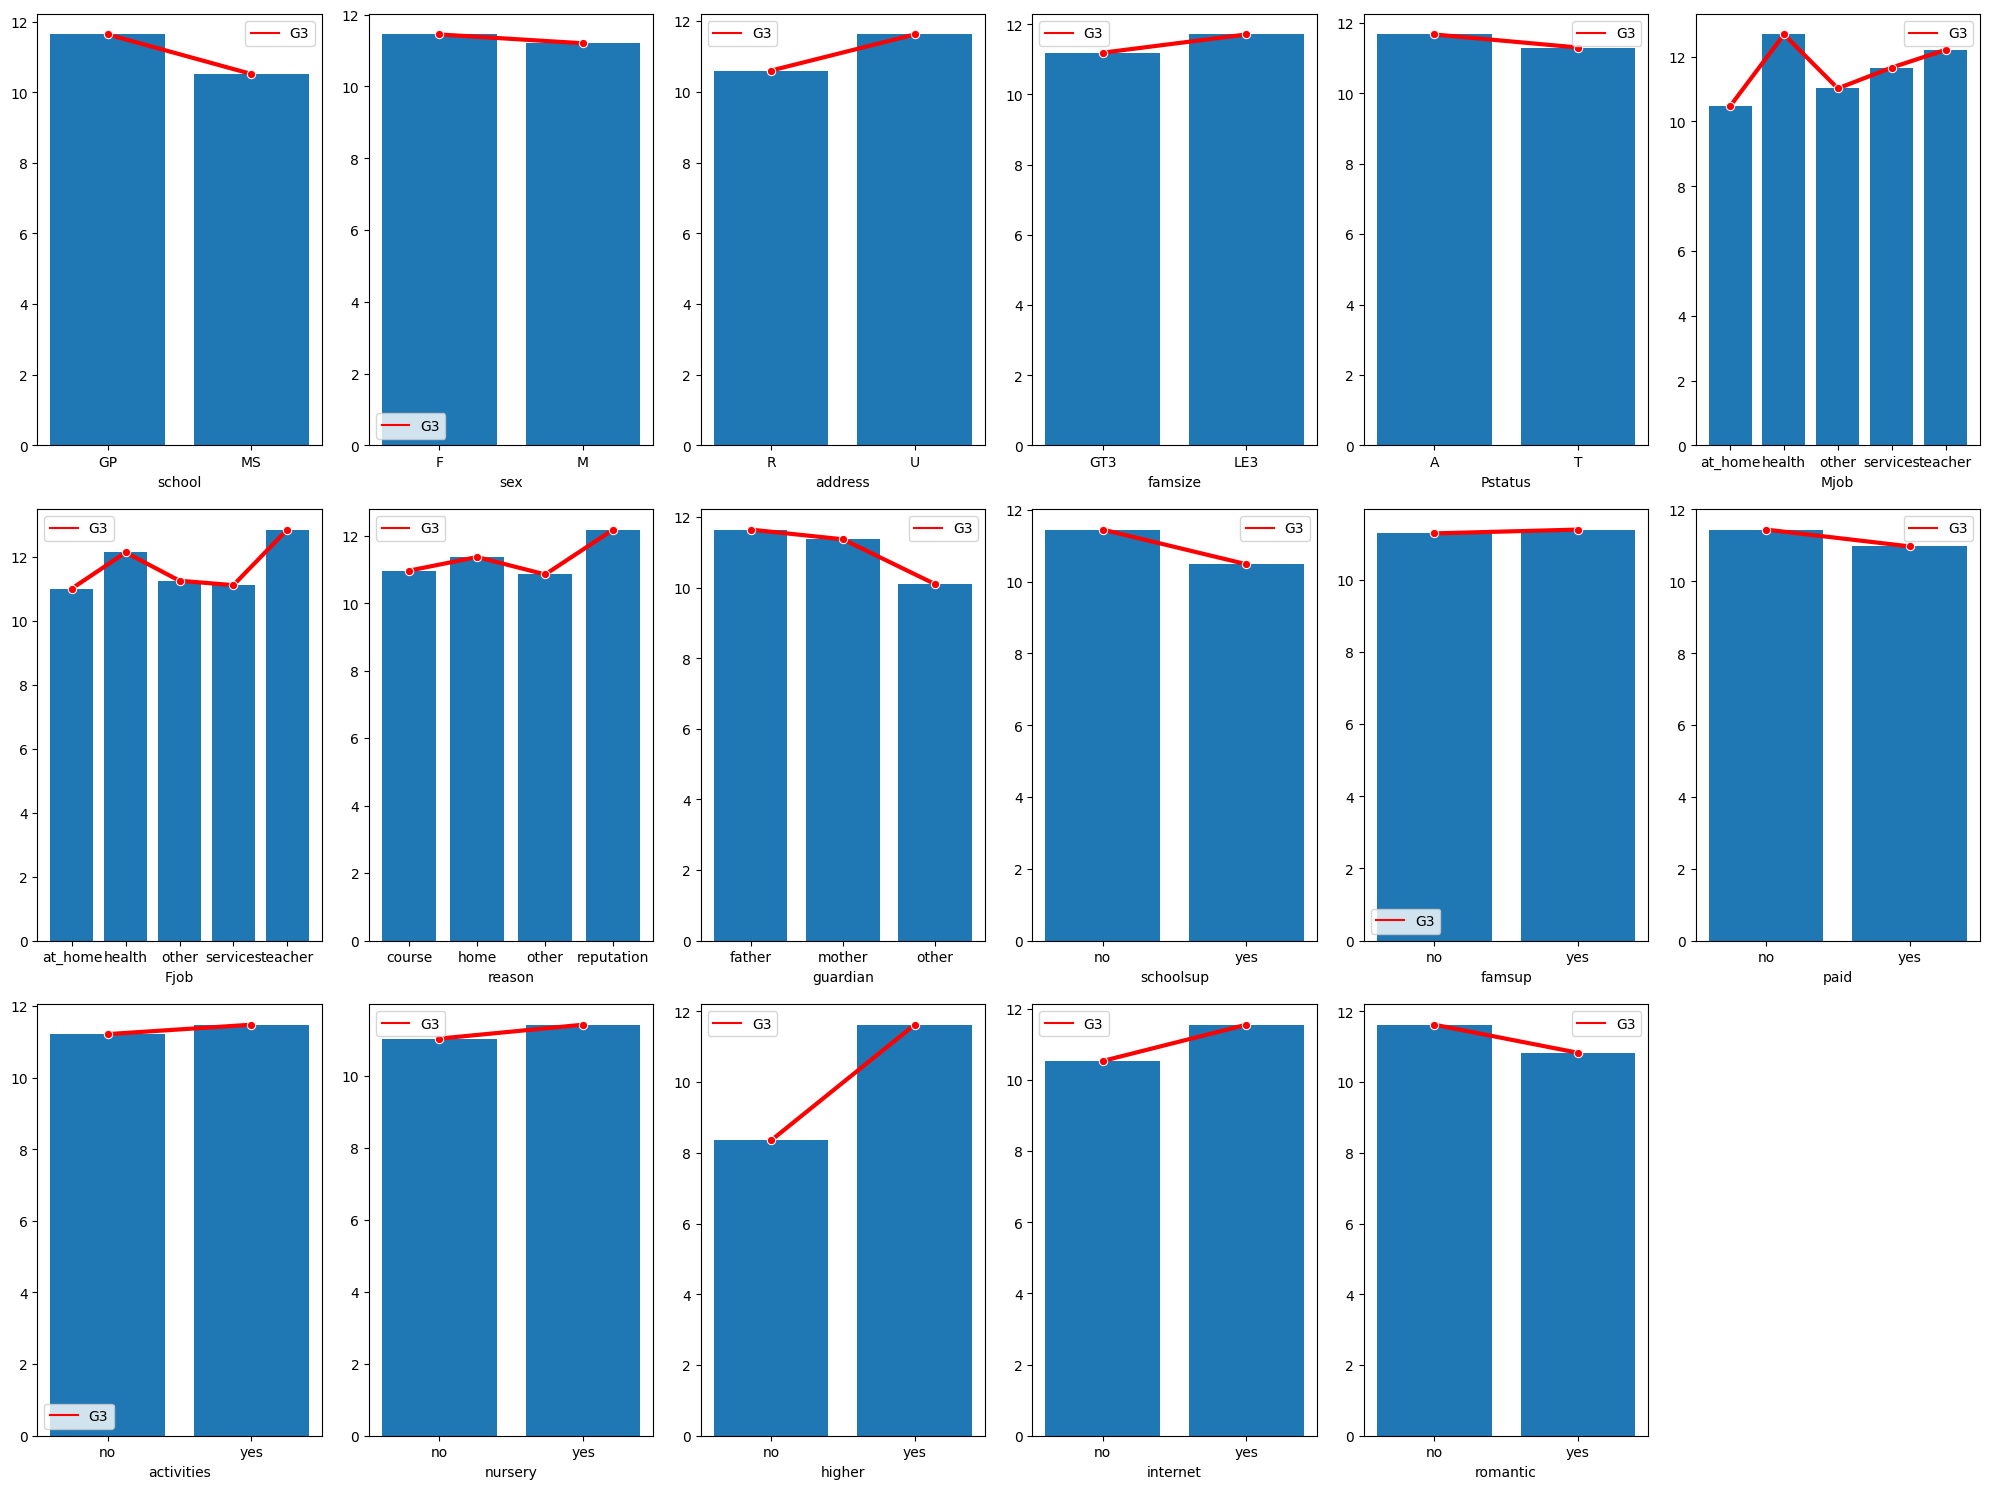

In [ ]:
plt.figure(figsize=(20,15))
for index,i in enumerate(obj_columns):
    a = df[['G3', i]].groupby(i).mean()
    axis = plt.subplot(3,6,index+1)
    axis.bar(x=a.index, height=a.G3)
    sns.lineplot(a, marker='o', palette=['red'], ax=axis, linewidth=3)

plt.tight_layout()

> score = G3  

We can see significant different in `Mjob`, `Fjob`, `reason`, `higher`, `guardian` columns.  
* student who they want to `continue their education` to higher level have higher mean score.
* students group with `no` mother and father as gurdian has lower mean score.
* students group that have `health` and `teacher` as the job of their mother or father have higher mean score.
* students group that chosen their school based on `reputation` have higher mean of score. (wierd thing !! XD)

# Outliers detection

In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
1043,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


<Axes: title={'center': 'G3'}, xlabel='[school]'>

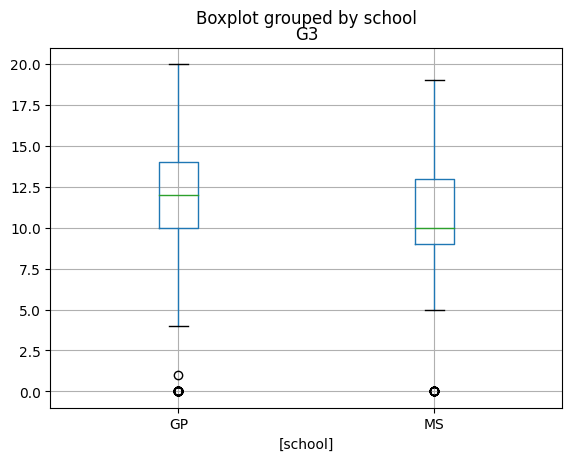

In [ ]:
df[['G3', 'school']].boxplot(by='school')

<Axes: >

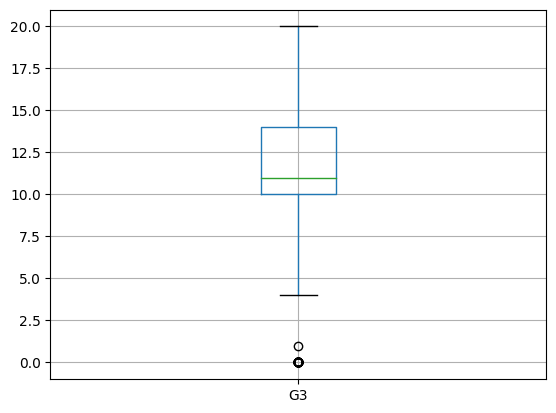

In [ ]:
df[['G3']].boxplot() #G3 box plot

We can see we have some outliers based on box plot that are `zero` and `near zero`.  
Lets see what they are...

In [ ]:
mask = df.G3 < 2.5
df[mask].G3.value_counts()

0    53
1     1
Name: G3, dtype: int64

we have **53** scores `0` and **1** score `1`.  
Obviously these score will bias our model and we should remove them.

In [ ]:
df = df.drop(df[mask].G3.index)

<Axes: >

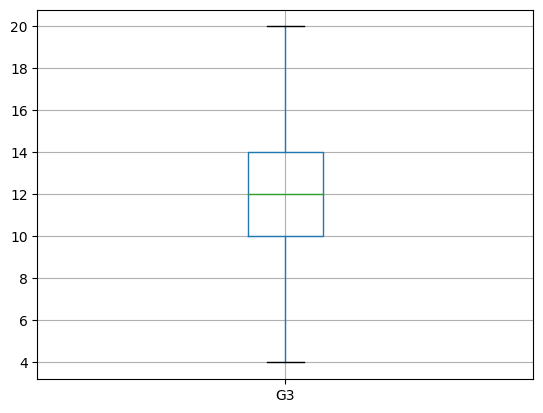

In [ ]:
df[['G3']].boxplot()

Now it is realy look like a pretty human and approximately has normal distribution shape

<Axes: ylabel='Density'>

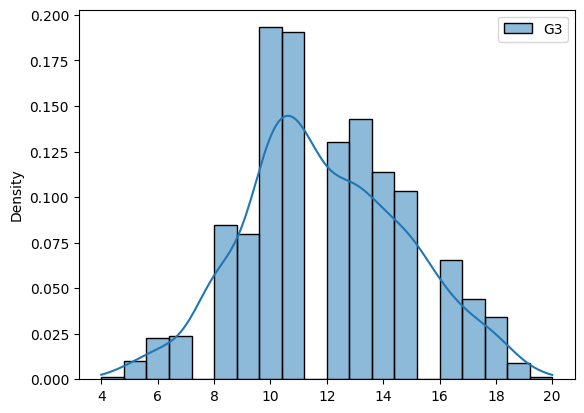

In [ ]:
sns.histplot(df[['G3']], stat='density', kde=True)

<Axes: title={'center': 'G3'}, xlabel='[school]'>

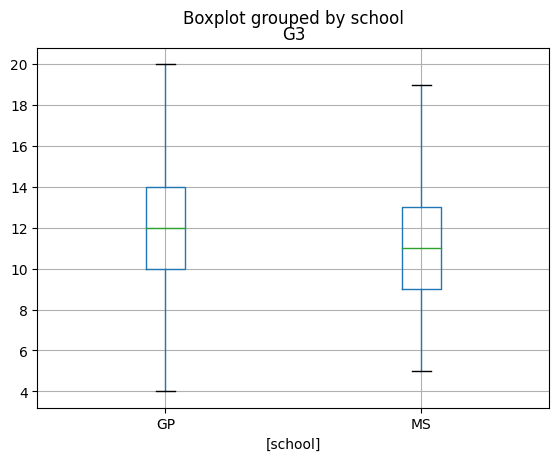

In [ ]:
df[['G3', 'school']].boxplot(by='school')

we also do not have outliers in each school scores.

> One thing else, If we analyse and try to separate dataset to two sub-dataset based on schools then:  
1. **We have to have more info and feature coresponded to schools and describe schools in more details.**  
2. **If we divide dataset, we have more skew features and make our features to be more unstable and unreliable in divided dataset.**
3. **We do not need to do that because both school have simmilar central tendency.**  
**So we do not use school separating for our analysis**

# Feature Engineering

Descriptive Analysis for object variables

In [ ]:
des_obj = df.select_dtypes(include='object').describe()
des_obj.iloc[3, ] = des_obj.iloc[3, ] / df.shape[0]
des_obj.index = ['count', 'unique', 'top', 'relative freq']
des_obj

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
relative freq,0.739464,0.566092,0.727011,0.706897,0.8841,0.382184,0.559387,0.411877,0.697318,0.886015,0.613027,0.789272,0.505747,0.799808,0.914751,0.792146,0.644636


based on what we see :
* 73 percent students chosen in `GP` school
* parents of 88 percent of students `live together`
* approximately 70 percent of students have their `mother` as their guardian
* family of 61 percents of students support them educationaly
* `80 percent` of students have internet

Descriptive analysis for numeric variables

In [ ]:
df.select_dtypes(exclude='object').describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


we can see G1, G2, G3 are simmilar to each other and we probably need some scaling for numeric features.

Let's plot Correlation matirx to find out how variance of data are related to each other

In [ ]:
df.G3

0       3.316625
1       3.316625
2       3.464102
3       3.741657
4       3.605551
          ...   
1039    3.000000
1040    4.000000
1041    2.645751
1042    3.162278
1043    3.000000
Name: G3, Length: 1044, dtype: float64

<Axes: >

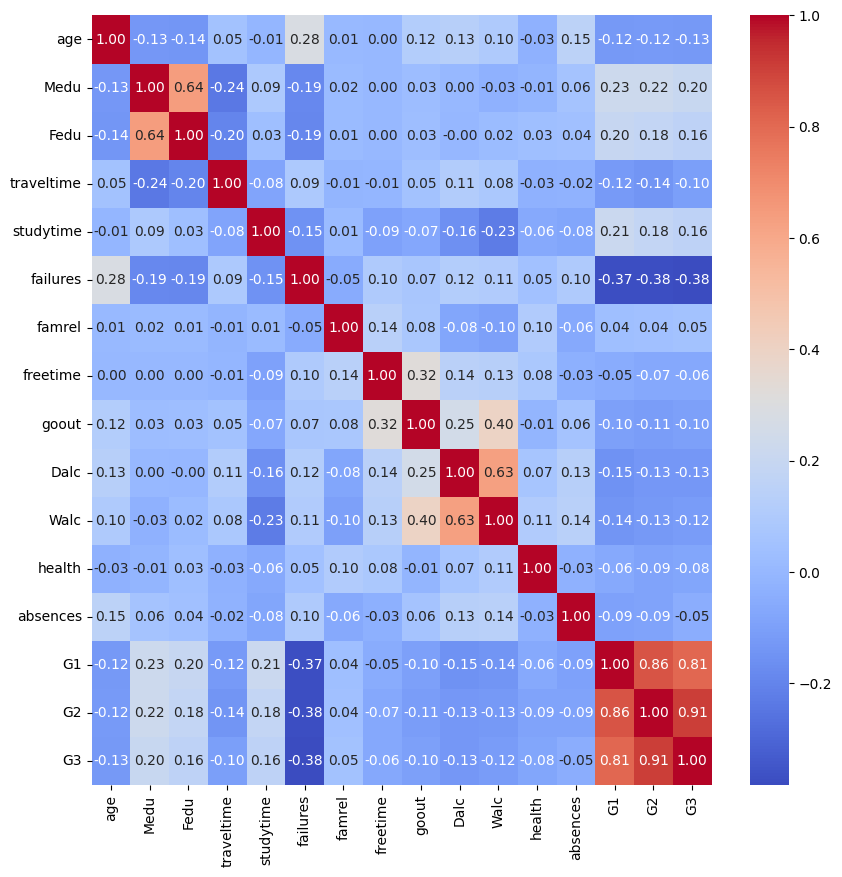

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.2f')

We can see there is good relationship between:
* `G1`,`G2`,`G3`
* `Dalc`,`Walc`
* `G1`,`G2`,`G3` and `failures`

We can see the `multicolinearity` in our dataset.

draw a pair plot will help us to better visualize data relation and distribution

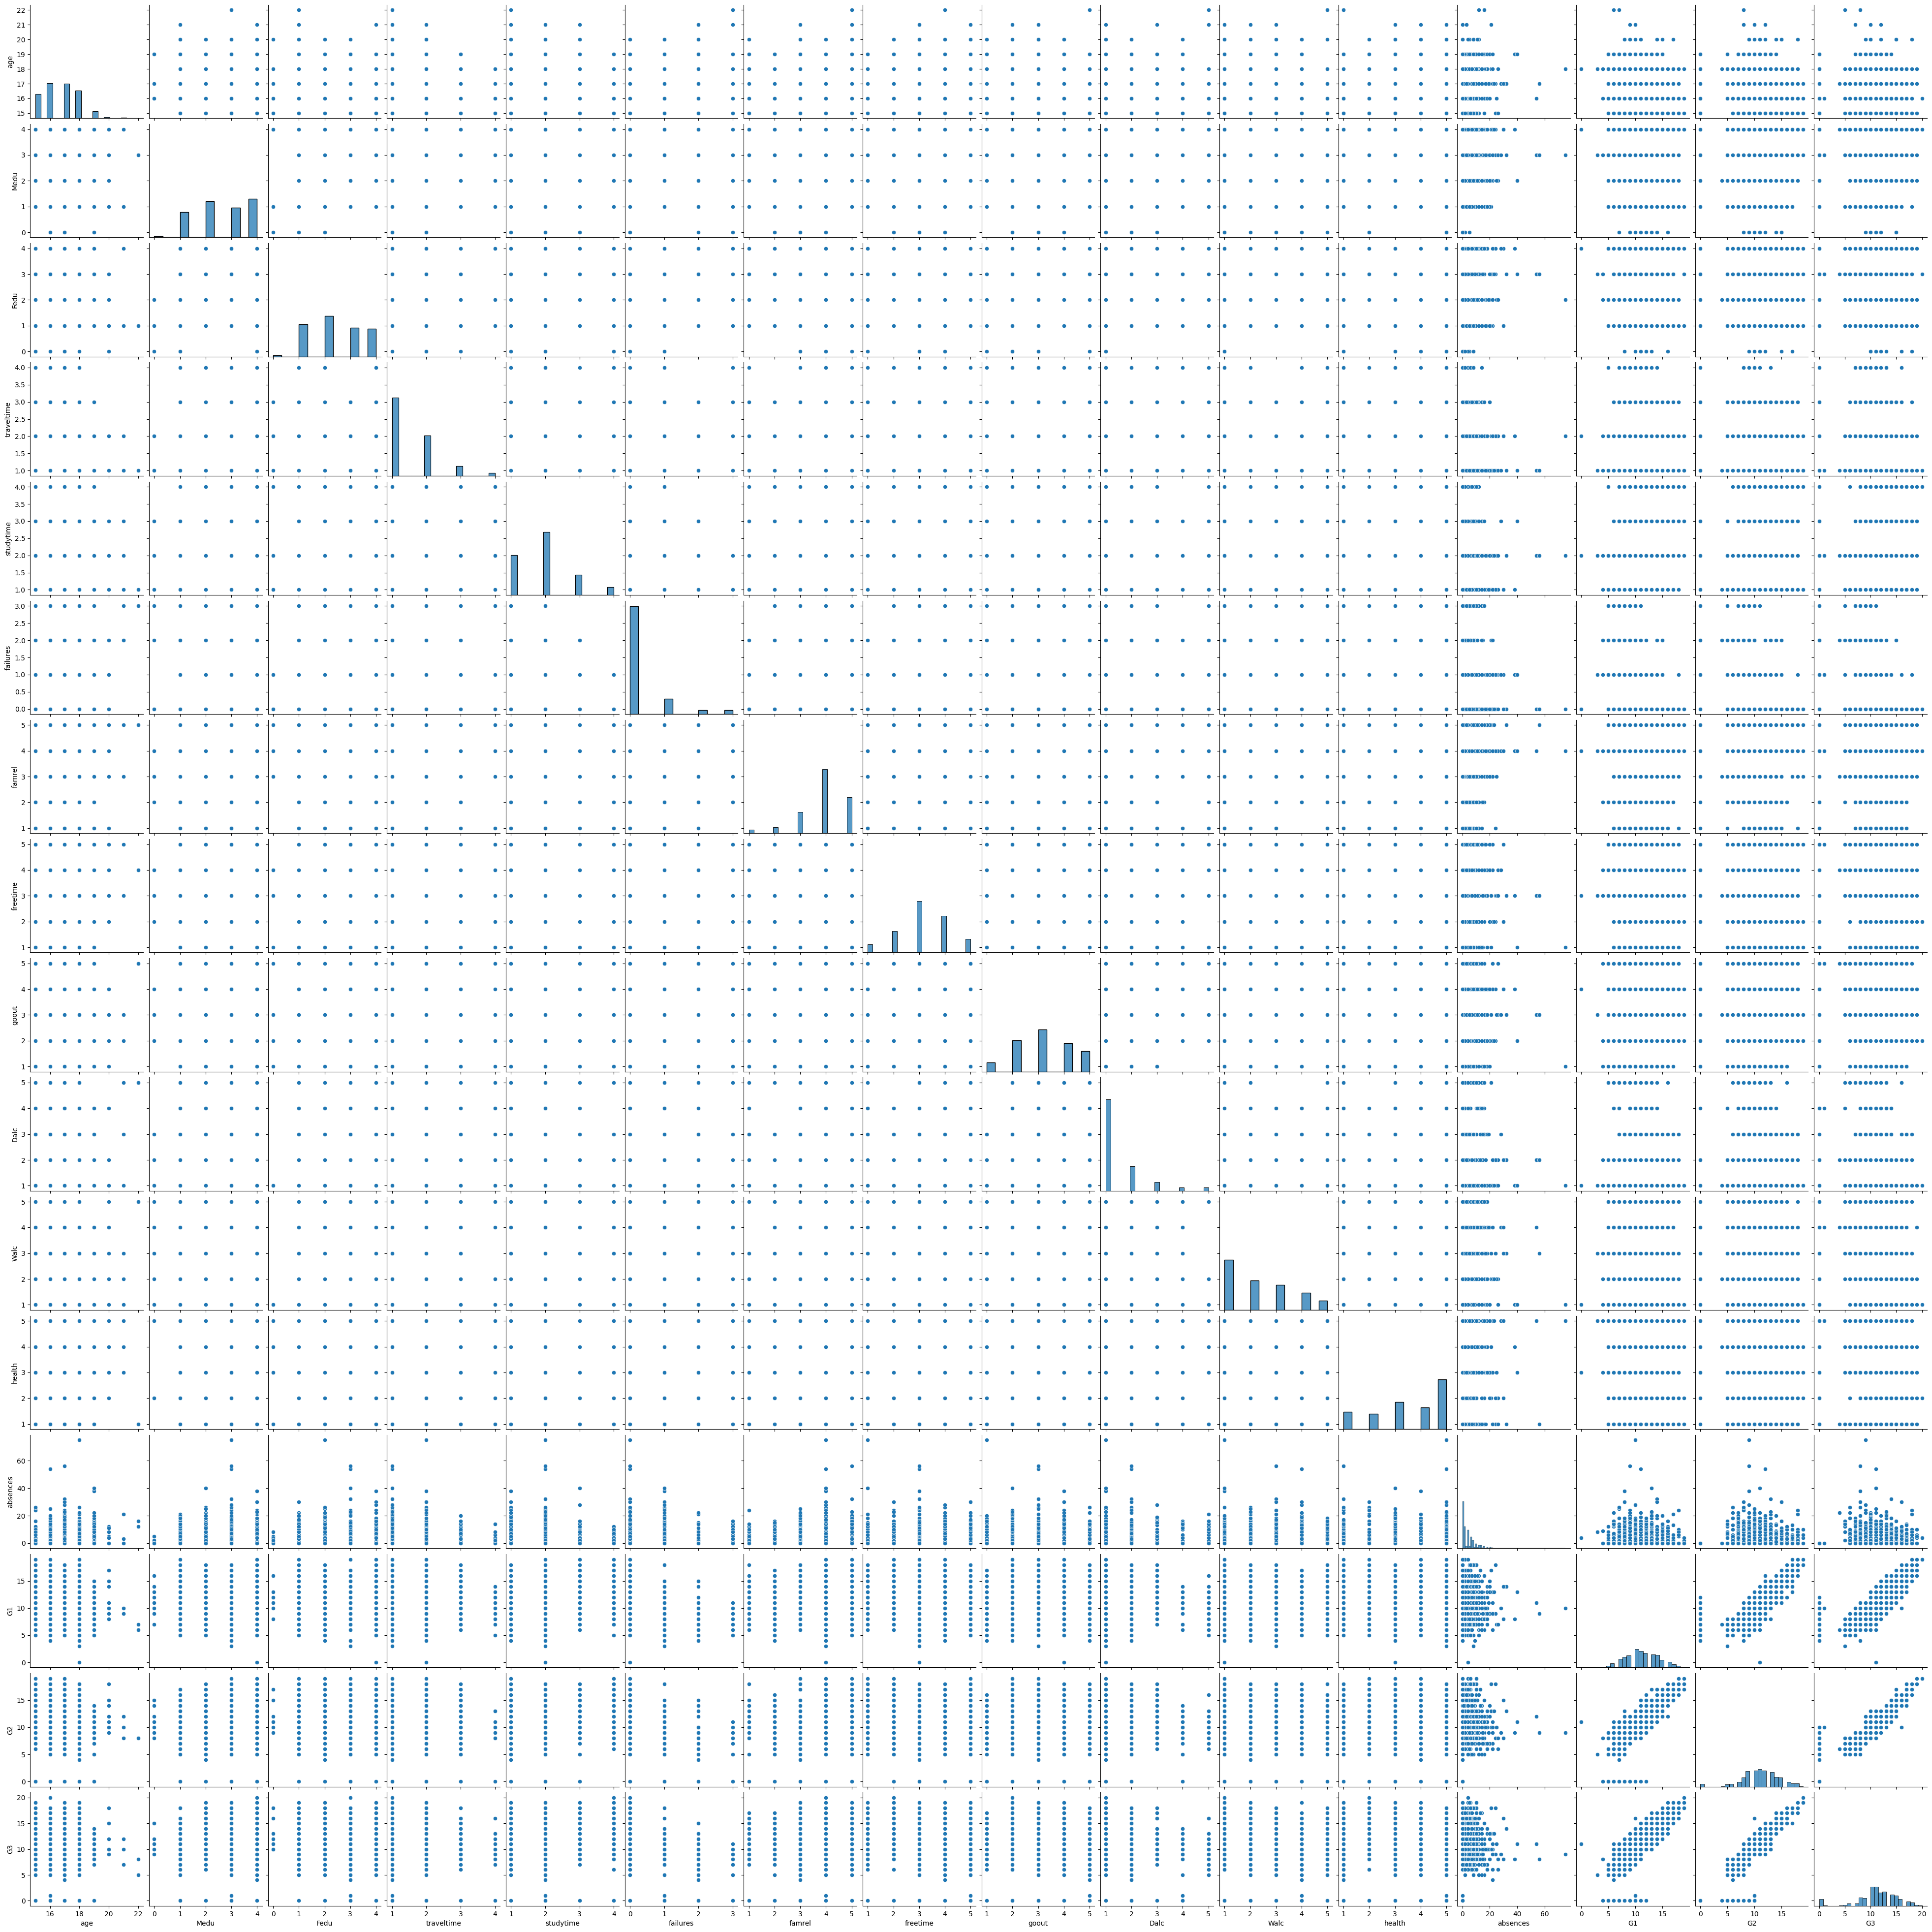

In [ ]:
#pair plot
sns.pairplot(df)

there is a few numeric features that they are not continius and not actualy numeic which are actualy object and the are encoded from categorical variable

## Clasified G3 into bad, normal, good

In [ ]:
mini = df['G3'].min()
maxi = df['G3'].max()
mini, maxi

(0, 20)

In [ ]:
df.G3.isnull().sum()

0

In [ ]:
pd.cut(df['G3'], bins=[mini-1,10,15,maxi], labels=[0, 1, 2]).isnull().sum()

0

In [ ]:
df['G3_bins'] = pd.cut(df['G3'], bins=[mini-1,10,15,maxi+1], labels=[0, 1, 2])

In [ ]:
df['G3_bins'].value_counts()

1    539
0    383
2    122
Name: G3_bins, dtype: int64

In [ ]:
df['G3_bins'].isnull().sum()

0

<Axes: xlabel='G3_bins', ylabel='Count'>

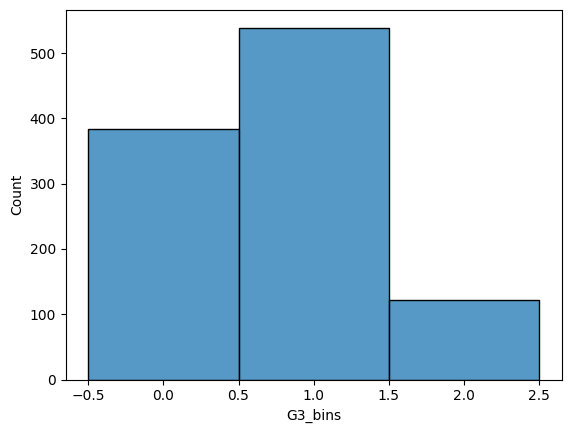

In [ ]:
sns.histplot(df['G3_bins'])

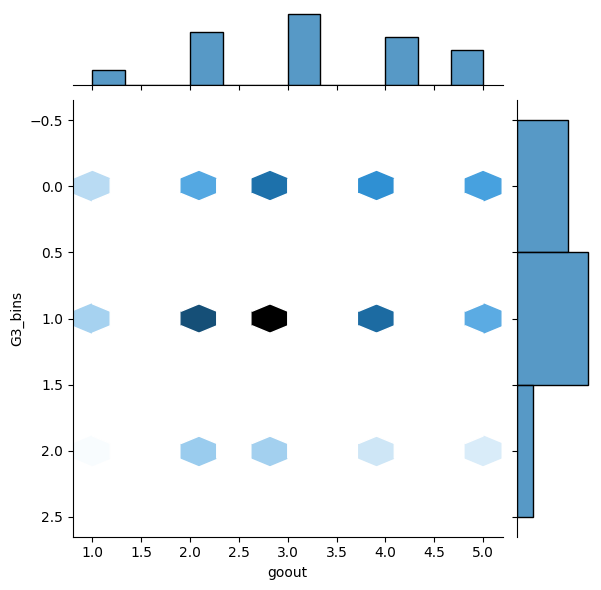

In [ ]:
#lets check joint plot between goout feature and our new G3_bins feature
sns.jointplot(x=df['goout'], y=df['G3_bins'], kind='hex')

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
G3_bins       0
dtype: int64

## Pre score Feature
we want to create a feature that is combination G1 and G2

In [ ]:
df['Pre_score'] = df['G1'] + df['G2']

In [ ]:
df.drop(columns=['G1','G2'], inplace=True)

## Skewness
we shoud change skewness of our skewed fearures

In [ ]:
skewness_overall = df.skew(numeric_only=True).sort_values(ascending=False)
skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)]

absences      3.741347
failures      2.783660
Dalc          2.157973
traveltime    1.369314
studytime     0.670982
Walc          0.625923
G3           -0.985965
famrel       -1.055775
dtype: float64

In [ ]:
features = skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)].index
features

Index(['absences', 'failures', 'Dalc', 'traveltime', 'studytime', 'Walc', 'G3',
       'famrel'],
      dtype='object')

In [ ]:
np.sqrt(df['absences']).skew()

0.5896167325689606

In [ ]:
for i in features:
    df[i] = np.sqrt(df[i])
    print(df[i].skew())

0.5896167325689606
1.991667197649375
1.7098790295787916
1.0173775163553604
0.2449764551433597
0.3311818361449402
-2.625219252362253
-1.6334755276578483


**We can not use `log` or `boxcox` because data were `negative` and `zero` as well**  
* we can use `dimension techniques` to reduce `dimension` and `multicolinearity`.

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G3_bins,Pre_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2.000000,3,4,1.000000,1.000000,3,2.000000,3.316625,1,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2.236068,3,3,1.000000,1.000000,3,1.414214,3.316625,1,20
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2.000000,3,2,1.414214,1.732051,3,2.449490,3.464102,1,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,1.732051,2,2,1.000000,1.000000,5,0.000000,3.741657,1,28
4,GP,F,16,U,GT3,T,3,3,other,other,...,2.000000,3,2,1.000000,1.414214,5,0.000000,3.605551,1,24


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Student Performance/Wrangling and EDA/pre-processed.csv', index=False)

# Done